<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [15]:
#타깃값으로 0이면 레드 와인, 1이면 화이트 화인 이건 분류문제
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [16]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [18]:
#표준화
data = wine[['alcohol', 'sugar', 'pH' ]].to_numpy()
target = wine['class'].to_numpy()

Text(0, 0.5, 'Frequancy')

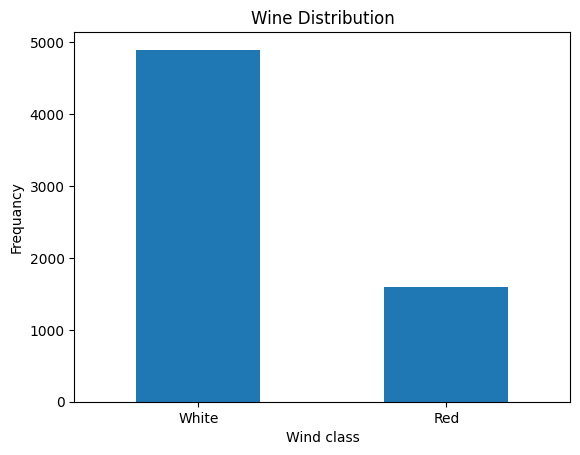

In [35]:
LABELS = ['White','Red']

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine['class'],sort = True)
count_classes.plot(kind='bar',rot=0)
plt.title('Wine Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Wind class')
plt.ylabel('Frequancy')

In [20]:
#훈련,테스트 데이터 나누기, 20% 정도만 테스트 세트로 나눔. 코드의 test_size=0.2
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, stratify=target,random_state=42)

In [21]:
print(train_input.shape, test_input.shape)


(5197, 3) (1300, 3)


In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
#ss.fit(test_input) <<---- 훈련하면 안됨 절대로

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7829517029055224
0.7761538461538462


In [24]:
#위 로지스틱 회귀 모델의 계수와 절편
print(lr.coef_, lr.intercept_)

[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]


In [25]:
'''
결정 트리 모델은 스무고개와 같다. 질문을 하나씩 던져서 정답과 맞춰가는 것이다.
데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다.
'''

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 훈련

0.9978833942659227
0.8646153846153846


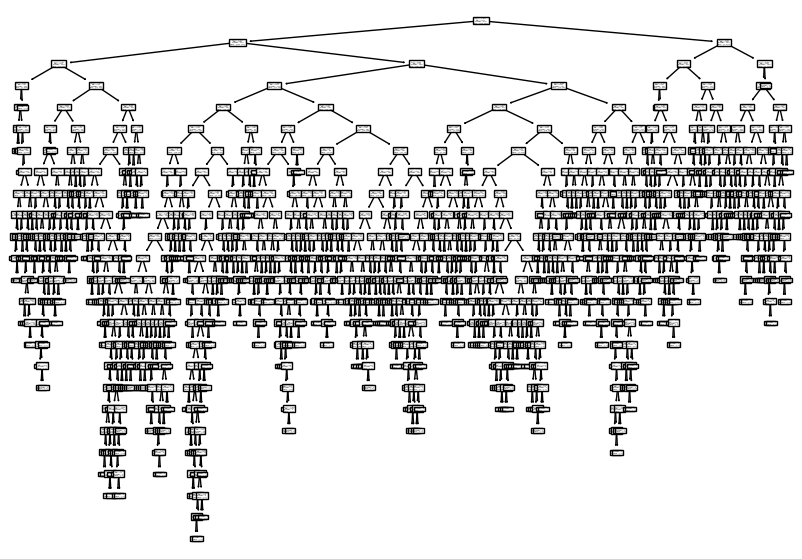

In [26]:
#과대적합 되었다.
#맨 위의 노드node를 루트 노드 root node라 부르고 맨 아래 끝에 달린 노드를 리프 노드 leaf node

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

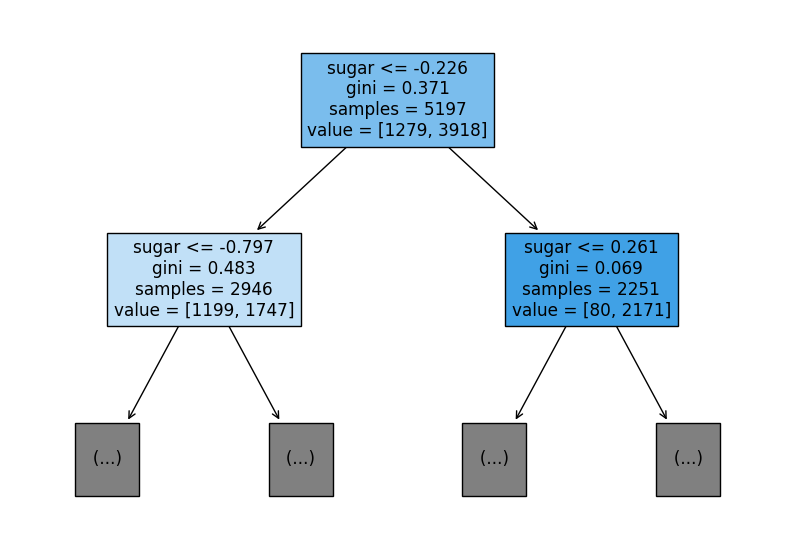

In [27]:
#max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
#또 filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다. feature_names 매개변수에는 특성의 이름을 전달 할 수 있다.
#루트 노드는 당도(sugar)가 -0.239 이하인지 질문을 한다.
#만약 어떤 샘플의 당도가 -.0239와 같거나 작으면 왼쪽 가지로 간다. 그렇지 않으면 오른쪽 가지로 이동한다. 즉 왼쪽이 Yes, 오른쪽이 No이다.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
'''
위의 gini는 gini불순도를 의미한다.
DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다. criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다.
앞의 그린 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나우었을까? 바로 criterion 매개변수에 지정한 지니 불순도를 사용한다.
지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다.
지니 불순도 = 1 - (음성 클래스 비율²+ 양성 클래스 비율²)

루트 노드는 총 5,197개의 샘플이 있고 그 중에 1,258개가 음성 클래스, 3,939개가 양성 클래스이다. 따라서 다음과 같이 지니 불순도를 계산할 수 있다.
1 - ((1258 / 5197)²+ (3939/5197)²) = 0.367
왼쪽과 오른쪽 노드의 지니 불순도도 한번 계산해 보자. 만약 100개의 샘플이 있는 어떤 노드의 두 클래스의 비율이 정확히 1/2씩 이라면 지니 불순도는 0.5가 되어 최악이 된다.
1 - ((50/100)²+(50/100)²) = 0.5
노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작다. 이런 노드를 순수 노드라고도 부른다.
1 - ((0/100)²+(100/100)²) = 0

결정 트리 모델은 부모 노드parent node와 자식 노드 child node 의 불순도 차이가 가능한 크도록 트리를 성장시킨다. 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법은
자식 노드의 분순도를 샘플 개수에 비례하여 모두 더한다. 그다음 부모 노드의 불순도에서 빼면 된다.

부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수 ) x 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) x 오른쪽 노드 불순도
= 0.367 - (2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066

이런 부모와 자식간의 불순도 차이를 정보이득이라고 부른다.

DecisionTreeClassifier 클래스에서 criterion='entropy'를 지정하여 엔트로피 불순도를 사용할 수 있다.
엔트로피 불순도도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱한다. 예를 들어 루트 노드의 엔트로피 불순도는 다음과 같이 계산할 수 있다.
-음성 클래스 비율 x log₂(음성 클래스 비율) - 양성 클래스 비율 x log₂(양성 클래스 비율) = -(1258/5197) x log₂(3939/5197) = 0.798
'''

#정리하자면 불순도를 기준으로 정보 이득(부모와 자식 노드 간의 불순도 차이)이 최대가 되도록 노드를 분할한다.
#노드를 순수하게 나눌수록 정보 이득이 커진다.
#새로운 샘플에 대해 예측할 때 에는 노드의 질문에 따라 트리를 이동한다. 그리고 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만든다.

"\n위의 gini는 gini불순도를 의미한다.\nDecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다. criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. \n앞의 그린 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나우었을까? 바로 criterion 매개변수에 지정한 지니 불순도를 사용한다. \n지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다.\n지니 불순도 = 1 - (음성 클래스 비율²+ 양성 클래스 비율²)\n\n루트 노드는 총 5,197개의 샘플이 있고 그 중에 1,258개가 음성 클래스, 3,939개가 양성 클래스이다. 따라서 다음과 같이 지니 불순도를 계산할 수 있다.\n1 - ((1258 / 5197)²+ (3939/5197)²) = 0.367\n왼쪽과 오른쪽 노드의 지니 불순도도 한번 계산해 보자. 만약 100개의 샘플이 있는 어떤 노드의 두 클래스의 비율이 정확히 1/2씩 이라면 지니 불순도는 0.5가 되어 최악이 된다.\n1 - ((50/100)²+(50/100)²) = 0.5\n노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작다. 이런 노드를 순수 노드라고도 부른다.\n1 - ((0/100)²+(100/100)²) = 0\n\n결정 트리 모델은 부모 노드parent node와 자식 노드 child node 의 불순도 차이가 가능한 크도록 트리를 성장시킨다. 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법은\n자식 노드의 분순도를 샘플 개수에 비례하여 모두 더한다. 그다음 부모 노드의 불순도에서 빼면 된다.\n\n부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수 ) x 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) x 오른쪽 노드 불순도 \n= 0.367 - (2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066\n\n이런 부

In [29]:
#지금부터 아까의 과대적합을 해결해보겠다

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8458726188185491
0.8407692307692308


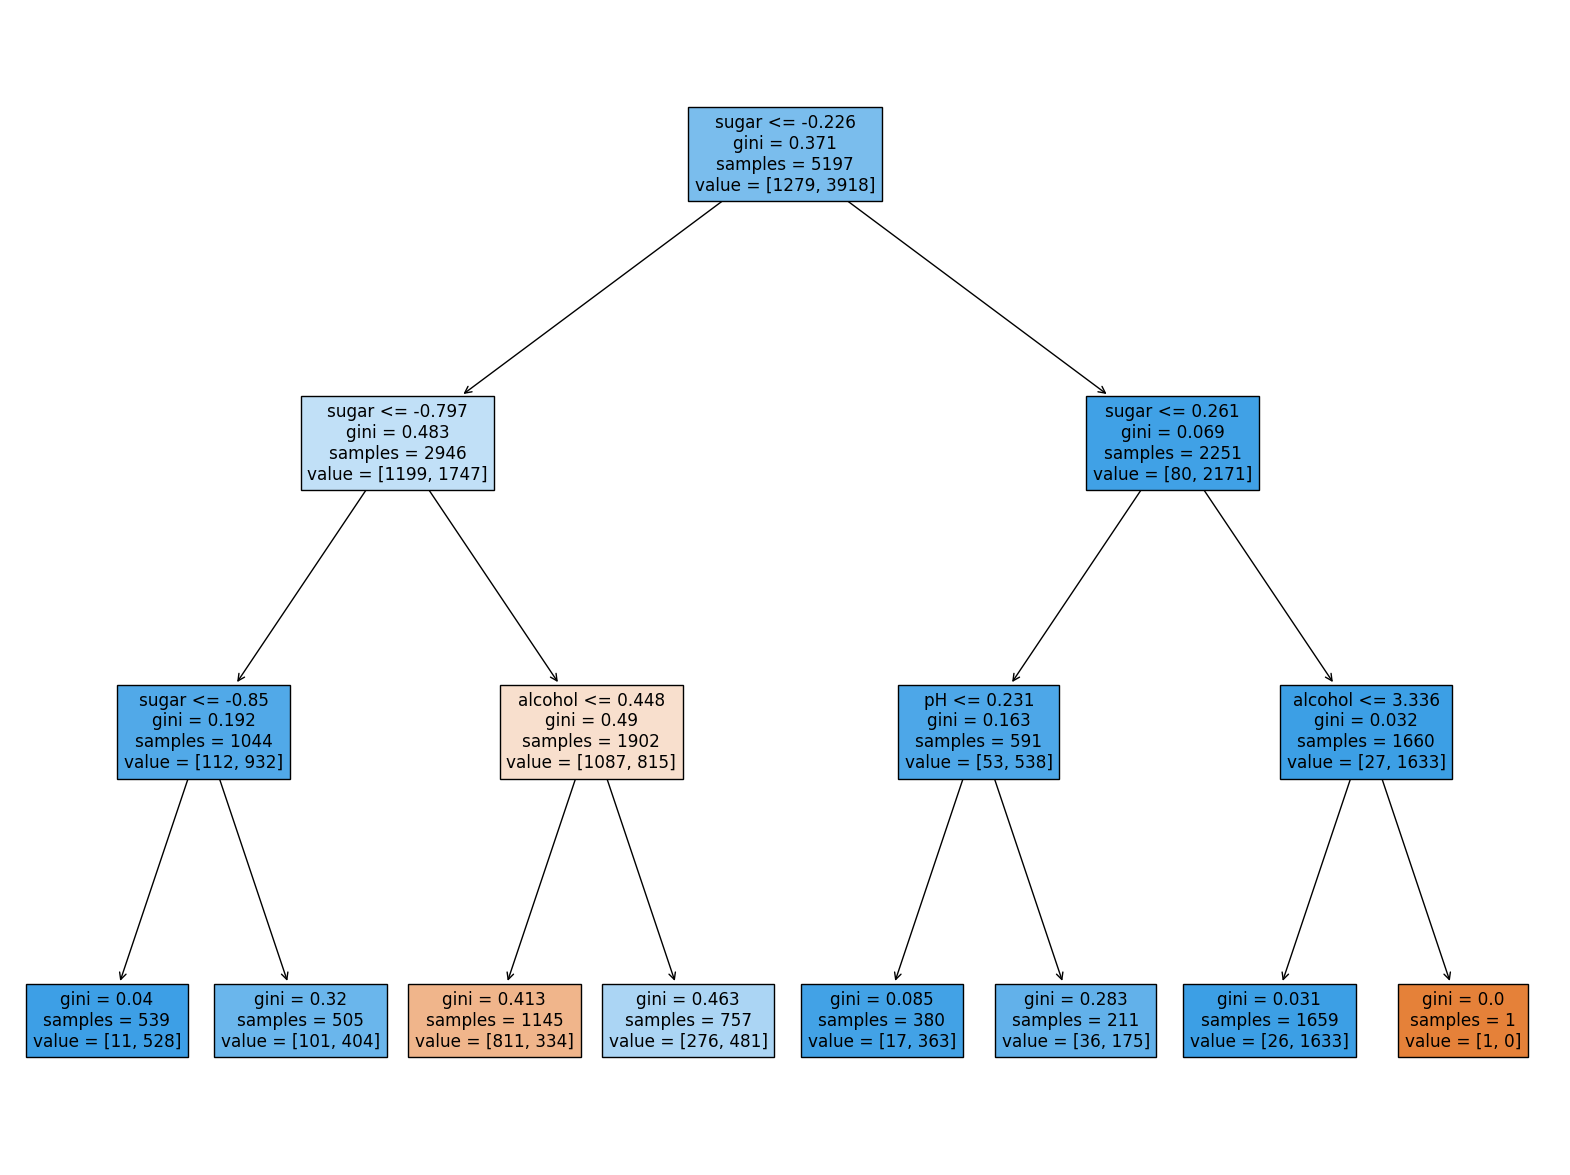

In [30]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [31]:
#정규화되지 않은 데이터로 다시 진행해보자

dt = DecisionTreeClassifier (max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8458726188185491
0.8407692307692308


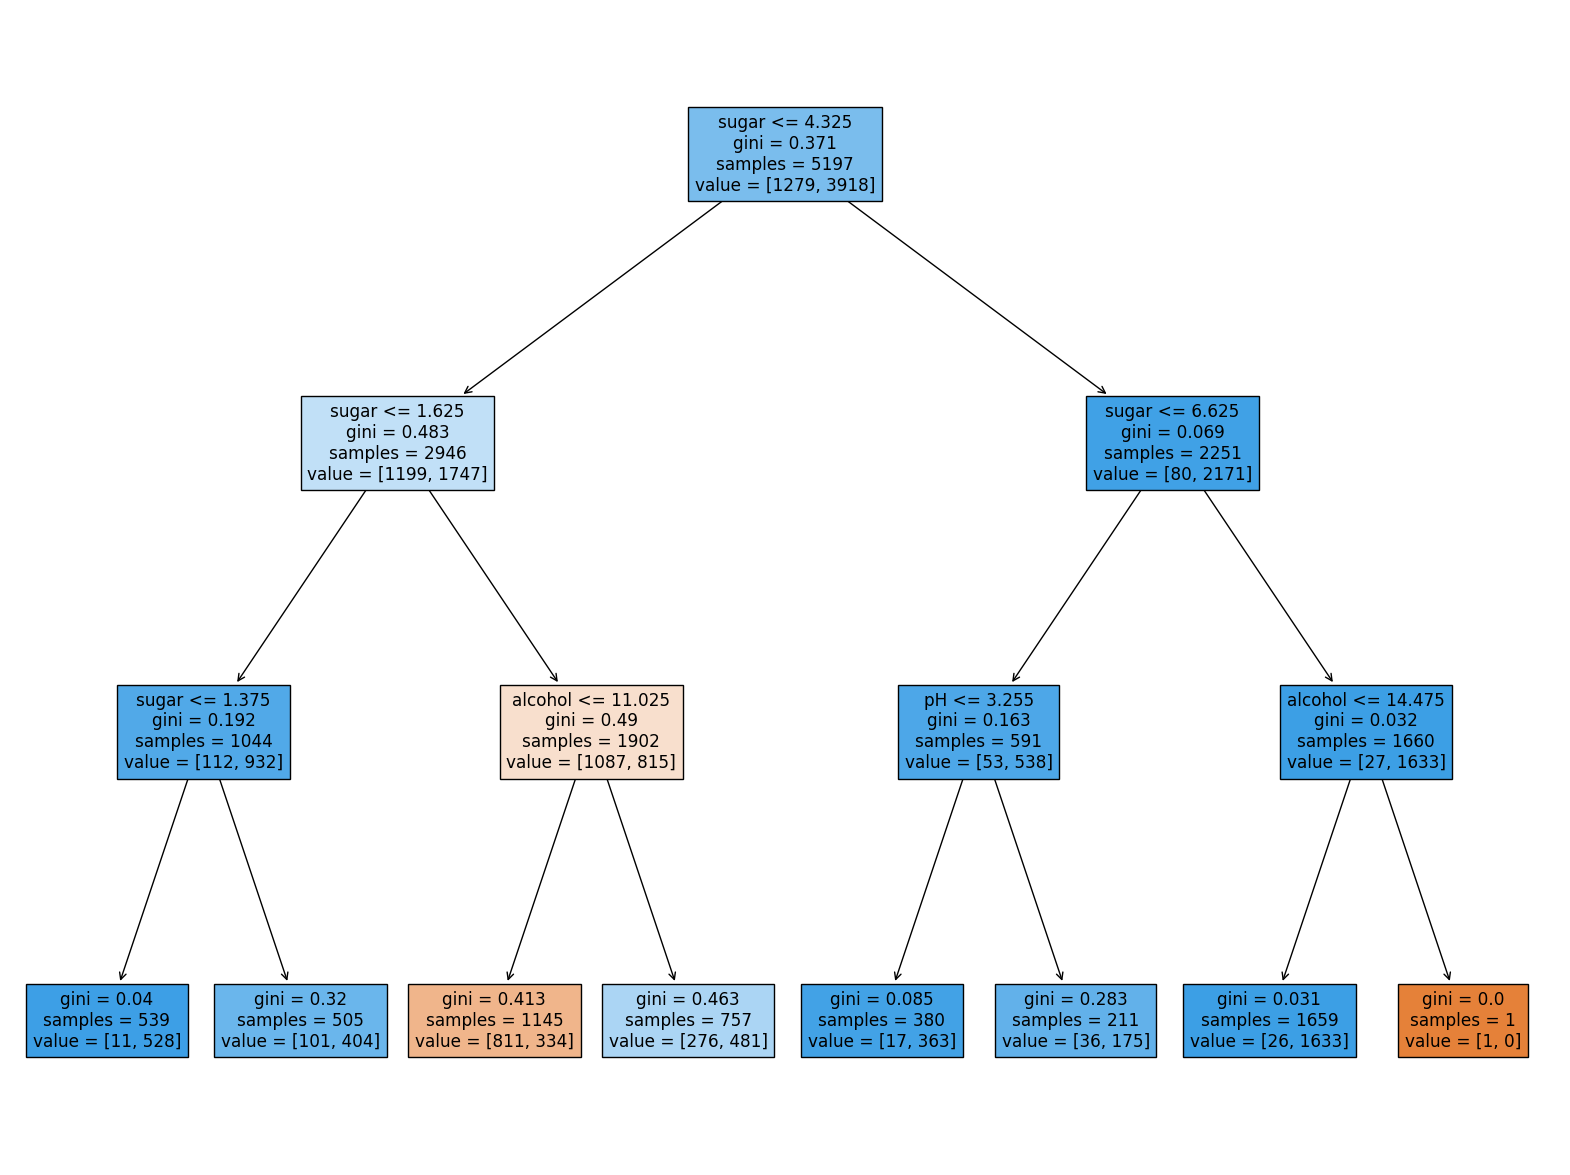

In [34]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
#결과적으로 설탕은 1.625보다 높고 알코올은 11.025보다 낮은 왼쪽에서 3번째 리프노드만 레드와인으로 예측했다.